In [ ]:
!pip uninstall keras
!pip install keras==2.2.4
!pip install tensorflow==1.13.1


Uninstalling Keras-2.4.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Keras-2.4.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/docs/*
    /usr/local/lib/python3.7/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.7/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 317kB 2.9MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 92.6MB 70kB/s 
     |████████████████████████████████| 3.2MB 31.2MB/s 
     |████████████████████████████████| 368kB 36.3MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimato

In [ ]:
import tensorflow as tf
import keras


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
copied_path ='/content/gdrive/MyDrive/FYP/TAGGED_Malay_Tweets_Training_Corpus.txt' 


In [ ]:
import pandas as pd

file=open(copied_path,"rt")
data=[]
contents =file.readlines()
indx=1
for x in contents:
    words=x.split()
    #print(len(words))
    for i in range(len(words)):
      tags=words[i].split("/")
      #print(len(tags))
      data.append([indx,tags[0],tags[1]])
    indx+=1



df=pd.DataFrame(data,columns=['sentence_idx','word','tag'])
df
    

sentence_idx        word     tag
0                 1        tadi     KAD
1                 1       dekat      KA
2                 1        bank      KN
3                 1        tiba     KAD
4                 1         ada      KK
...             ...         ...     ...
38709          1791          ni  GT-KEP
38710          1791         aku     GN1
38711          1791  kasihankan      KK
38712          1791        anak      KN
38713          1791         dia     GN3

[38714 rows x 3 columns]

In [ ]:
tag=df['tag'].unique()
tag

array(['KAD', 'KA', 'KN', 'KK', 'KPE', 'KB', 'GN3', 'SL', 'GT', 'KTY',
       'FOR', 'KAD-KEP', 'MW', 'KPN', 'KS', 'KH', 'KNF-KEP', 'KH-KEP',
       'GDT-KTY', 'KB-KEP', 'GT-KEP', 'LD', 'KP', 'GN1', 'GN2', 'KBIL',
       'KN-KEP', 'GN2-LD', 'KSR', 'BY', 'GN3-LD', 'KPB', 'KEP', 'NEG',
       'KA-KEP', 'KNF', 'KAR', 'GL', 'KPM', 'KN-LD', 'FOR-KEP', 'AWL',
       'FOR-NEG', 'GN1-LD', 'KPN-KEP'], dtype=object)

In [ ]:
vocab=df['word'].unique()
vocab

array(['tadi', 'dekat', 'bank', ..., 'terbit', 'pertemukan', 'kasihankan'],
      dtype=object)

In [ ]:
df['tag'].value_counts()

KN         7533
KK         5152
FOR        3445
KA         3429
SL         1516
KB-KEP     1438
KH         1436
LD         1343
KPN        1324
GN1        1283
KNF-KEP    1146
KAD        1125
KS         1054
GT          929
KB          908
GDT-KTY     642
GT-KEP      638
BY          566
GN3         512
KSR         342
GN2         328
KBIL        295
KPE         267
KP          264
KH-KEP      254
KTY         242
KNF         172
KA-KEP      156
GL          153
KEP         139
NEG         129
KPB         106
KAR          86
KAD-KEP      83
GN3-LD       74
GN2-LD       72
KN-KEP       51
MW           30
KN-LD        16
KPM          11
FOR-KEP       8
GN1-LD        7
FOR-NEG       5
AWL           4
KPN-KEP       1
Name: tag, dtype: int64

In [ ]:
class SentenceGetter(object):
    
    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w, t) for w,t in zip(s["word"].values.tolist(),
                                                        s["tag"].values.tolist())]
        self.grouped = self.dataset.groupby("sentence_idx").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
getter = SentenceGetter(df)

In [ ]:
sentences = getter.sentences

In [ ]:
print(sentences)

[[('tadi', 'KAD'), ('dekat', 'KA'), ('bank', 'KN'), ('tiba', 'KAD'), ('ada', 'KK'), ('pakcik', 'KN'), ('minta', 'KPE'), ('tolong', 'KPE'), ('bawa', 'KK'), ('kan', 'KB'), ('keluar', 'KK'), ('duit', 'KN'), ('dia', 'GN3'), ('tolong', 'KPE'), ('la', 'SL'), ('pakcik', 'KN'), ('itu', 'GT'), ('bila', 'KTY'), ('check', 'FOR'), ('baki', 'KN'), ('dulu', 'KAD-KEP'), ('ada', 'KK'), ('ringgit', 'MW'), ('malaysia', 'MW'), ('saja', 'KPN'), ('dalam', 'KS'), ('bank', 'KN'), ('dia', 'GN3'), ('lepas', 'KH'), ('itu', 'GT'), ('dia', 'GN3'), ('kata', 'KN'), ('boleh', 'KB'), ('tak', 'KNF-KEP'), ('bawa', 'KK'), ('keluar', 'KK'), ('ringgit', 'MW'), ('malaysia', 'MW'), ('and', 'FOR'), ('tried', 'FOR'), ('tapi', 'KH-KEP'), ('tak', 'KNF-KEP'), ('boleh', 'KB'), ('kasihan', 'KK'), ('dekat', 'KA'), ('pakcik', 'KN'), ('itu', 'GT')], [('pengulas', 'KN'), ('pun', 'KPN'), ('macam', 'KN'), ('tak', 'KNF-KEP'), ('tahu', 'KA'), ('apa', 'GDT-KTY'), ('nak', 'KB-KEP'), ('juga', 'KPN'), ('ni', 'GT-KEP')], [('kenapa', 'KTY'), ('

In [ ]:
maxlen = max([len(s) for s in sentences])
print ('Maximum sequence length:', maxlen)
#check the max length of a sentence so that we can pad them

Maximum sequence length: 74


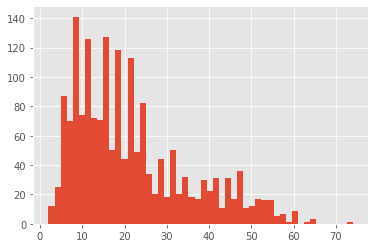

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

plt.hist([len(s) for s in sentences], bins=50)
plt.show()

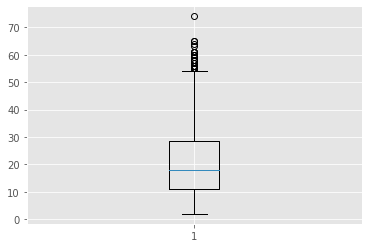

In [ ]:
plt.boxplot([len(s) for s in sentences])
plt.show()

In [ ]:
#Map sentences and POS tags
from future.utils import iteritems

words = list(set(df["word"].values))
number_words = len(words)

word2idx = {w: i+1 for i, w in enumerate(words)}
idx2word = {i: w for w, i in iteritems(word2idx)}

tags = list(set(df["tag"].values))
number_tags = len(tags)

tag2idx = {t: i+1 for i, t in enumerate(tags)}
idx2tag = {i: w for w, i in iteritems(tag2idx)}

In [ ]:
print(word2idx)

{'masa': 1, 'lebar': 2, 'you': 3, 'sains': 4, 'merch': 5, 'terakhir': 6, 'kelmarin': 7, 'setengah': 8, 'low': 9, 'qodo': 10, 'hai': 11, 'wuhu': 12, 'bangang': 13, 'sentiasa': 14, 'cancelled': 15, 'sport': 16, 'macho': 17, 'kasihan': 18, 'giveaway': 19, 'ewah': 20, 'pingge': 21, 'poem': 22, 'famous': 23, 'lapu': 24, 'kakya': 25, 'sokong': 26, 'joox': 27, 'sound': 28, 'pengesahan': 29, 'kompromi': 30, 'racism': 31, 'kejadian': 32, 'pernafasan': 33, 'establish': 34, 'sedak': 35, 'berebut': 36, 'treatment': 37, 'campur': 38, 'fana': 39, 'jalah': 40, 'gaakan': 41, 'masang': 42, 'at': 43, 'lu': 44, 'panjangkan': 45, 'luak': 46, 'pusat': 47, 'gelap': 48, 'bulu': 49, 'shue': 50, 'sha': 51, 'kea': 52, 'kemah': 53, 'they': 54, 'bilang': 55, 'dipersalahkan': 56, 'iffah': 57, 'santun': 58, 'kasih': 59, 'jia': 60, 'tupat': 61, 'sistem': 62, 'laci': 63, 'desc': 64, 'ngh': 65, 'angguk': 66, 'smart': 67, 'mula': 68, 'tercabut': 69, 'berinai': 70, 'bika': 71, 'hapened': 72, 'berusaha': 73, 'cintakah': 

##Padding


In [ ]:
MAX_LEN=maxlen

In [ ]:
#Pad sequence data 
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=MAX_LEN, sequences=X, padding="post")
print(X)

[[3738 5318 3230 ...    0    0    0]
 [3207 2860  405 ...    0    0    0]
 [4808 4163 2964 ...    0    0    0]
 ...
 [1780 3516 2552 ...    0    0    0]
 [4808 4561 5123 ...    0    0    0]
 [4808  530 4631 ...    0    0    0]]


In [ ]:
print(number_tags,number_words)

45 5388


In [ ]:
y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=MAX_LEN, sequences=y, padding="post")

#One hot encode 
from tensorflow.keras.utils import to_categorical
y = [to_categorical(i, num_classes=number_tags+1) for i in y]

In [ ]:
#Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train)

[[1138 3296 1758 ...    0    0    0]
 [ 624 4742 4561 ...    0    0    0]
 [4884 1555 2860 ...    0    0    0]
 ...
 [2346 3095  225 ...    0    0    0]
 [1887  128 3694 ...    0    0    0]
 [ 966 1141 1984 ...    0    0    0]]


##BI-LSTM-CRF

##Direct use Embedding layer from Keras (Supervised learning)

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-_2f6n6k3
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-_2f6n6k3
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp37-none-any.whl size=101065 sha256=398e6a45e6bd44b536cd950b75027a1ff2d1e4be3a9a8b6c05558bf0e11a5c6b
  Stored in directory: /tmp/pip-ephem-wheel-cache-qlc0t1yd/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Dropout, TimeDistributed, Bidirectional
from keras_contrib.layers import CRF
import pickle

import numpy as np
from numpy import random

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [ ]:
embedding_index={}
mswiki_vector="/content/gdrive/MyDrive/FYP/mswiki.vector"
f=open(mswiki_vector,'rt')

for line in f:
  values=line.split()
  word=values[0]
  vector=np.asarray(values[1:],dtype='float32')
  embedding_index[word]=vector
f.close()


In [ ]:
Word2VecModel ='/content/gdrive/MyDrive/FYP/modelPGKMalayTweet.bin' 

NewGensim=Word2Vec.load(Word2VecModel)
print(NewGensim)

Word2Vec(vocab=5388, size=300, alpha=0.025)


In [ ]:
NewGensim['tadi']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-4.33666661e-04, -7.67818885e-04, -1.47157314e-03,  1.53740938e-03,
       -1.58387213e-03, -2.37267130e-04, -1.08593702e-03, -6.48690388e-04,
       -1.32433546e-04,  3.32111842e-04, -5.97895472e-04,  2.86321592e-04,
        4.66892088e-04,  1.57549861e-03, -8.68190837e-05, -1.58378141e-04,
        1.52219669e-03,  1.64580869e-03,  8.58272106e-05, -1.08126167e-03,
        1.47912838e-03, -1.65042607e-03, -1.56302506e-03,  4.63023229e-04,
       -3.49237875e-04,  9.21449158e-04,  1.60968199e-03,  7.03918573e-04,
        1.08760374e-03,  1.43609894e-03,  1.93364584e-04, -1.96490713e-04,
        1.61706272e-03,  8.89133895e-04,  1.62699015e-03,  9.51165974e-04,
       -9.15676123e-04,  7.78737362e-04, -2.68176314e-04, -1.57768111e-04,
        1.55907357e-04,  5.44793089e-04,  1.52798730e-03, -1.27933885e-03,
       -8.11739810e-05,  8.47376126e-04, -7.29758700e-04,  1.18253939e-03,
        1.13363285e-03,  1.56450854e-03,  1.00113160e-03, -1.58105488e-03,
       -1.51247031e-03, -

In [ ]:
embedding_index

{'175214': array([300.], dtype=float32),
 'dan': array([ 0.942402  , -0.16909422, -0.54786056, -1.9255592 , -1.3730944 ,
         0.37000313,  0.11406247,  1.793599  ,  1.6809778 , -0.5720783 ,
        -1.3564607 , -0.67749214, -0.18264702, -0.04564511, -1.6191293 ,
         0.05614113,  0.3713313 ,  0.12439046,  0.69927216, -1.5821592 ,
        -0.8245032 , -0.2961932 ,  1.2770777 ,  1.0315504 ,  1.663025  ,
         0.2293702 , -1.0811735 ,  1.653268  ,  0.5962476 , -0.52354056,
        -1.4209061 ,  1.1336119 , -0.09423066,  0.8474265 , -0.37709564,
        -0.00499301,  1.05199   ,  0.41884926, -0.78250146,  0.90197647,
         0.43386143, -0.13020456,  0.3794237 , -1.1148738 ,  0.07740838,
        -0.26206326, -0.9447193 ,  0.1115996 , -0.37976205,  1.3061005 ,
         1.1327161 , -1.8908906 ,  1.3303621 , -0.91014177,  0.96478003,
        -1.6917232 ,  0.05810868, -1.2375492 , -0.891035  ,  0.05770119,
        -1.3227358 ,  0.5020875 ,  1.1962912 ,  0.7822439 , -0.33854178,
   

In [ ]:
def get_key(input):
  for k,i in word2idx.items():
    if input==i:
      print(k)
#word that not in pre-trained word2vec
get_key(5365)

somebody


In [ ]:
def get_embeddingmatrix(embedding_index,model,word2idx,embedding_dim,init_unk=True,variance=None):
  count=0
  embedding_matrix=np.zeros((number_words+1,embedding_dim))
  for word,i in word2idx.items():
    embedding_vector=embedding_index.get(word)
    if(embedding_vector is not None):
      embedding_matrix[i]=embedding_vector
    else:
      count+=1
      embedding_matrix[i]=model[word]
      #print(i,word,embedding_matrix)
  
  #print(count) 
  return embedding_matrix   

print(get_embeddingmatrix(embedding_index,NewGensim,word2idx,300))

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.44081768  0.14945295 -1.32661629 ... -0.28513375  1.74068701
  -0.41001692]
 [-1.53481829 -1.4514327   0.93857509 ... -0.50159442  1.19334376
  -0.37222219]
 ...
 [-0.58292097  1.50443327  1.88578105 ...  0.17638767  0.15244283
   0.05754299]
 [ 0.12881619 -0.06505463 -0.16999683 ...  0.04096771 -0.36378765
   0.55427057]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


825 word not in pre-trained model

In [ ]:
# coding=utf-8

class BiLstmCrfModel(object):
    def __init__(
            self, 
            MAX_LEN, 
            number_words, 
            DIM_EMBEDDINGS,  
            number_tags,
            embedding_matrix,
            mask_zero=True
        ):
        super(BiLstmCrfModel, self).__init__()
        self.MAX_LEN = MAX_LEN
        self.number_words = number_words
        self.DIM_EMBEDDINGS = DIM_EMBEDDINGS
        self.number_tags = number_tags
        self.embedding_matrix=embedding_matrix
    

    def build(self):
        input = Input(shape=(self.MAX_LEN,))

        #Embedding layer
        model = Embedding(input_dim=self.number_words+1, 
                          input_length=self.MAX_LEN,
                          mask_zero=True,
                          weights=[embedding_matrix],
                          output_dim=self.DIM_EMBEDDINGS,
                          trainable=False)(input)
        

        #BiLSTM layer
        model = Bidirectional(LSTM(units=self.DIM_EMBEDDINGS, 
                                  return_sequences=True, 
                                 ))(model)

        #TimeDistributed layer
        model = TimeDistributed(Dense(self.number_tags+1, activation="relu"))(model)

        #CRF layer
        crf = CRF(self.number_tags+1)  
        out = crf(model)  

        model = Model(input, out)
        
        model.compile(optimizer='adam', 
                    loss=crf.loss_function, 
                    metrics=[crf.accuracy]
                    )
        print(model.summary())

        return model
        

In [ ]:
embedding_matrix=get_embeddingmatrix(embedding_index,NewGensim,word2idx,300)

In [ ]:
model2=BiLstmCrfModel(MAX_LEN,number_words,300,number_tags,embedding_matrix).build()
history2=model2.fit(X_train, np.array(y_train), batch_size=30, epochs=6, validation_split=0.2, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 74)                0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 74, 300)           1616700   
_________________________________________________________________
bidirectional_8 (Bidirection (None, 74, 600)           1442400   
_________________________________________________________________
time_distributed_8 (TimeDist (None, 74, 46)            27646     
_________________________________________________________________
crf_8 (CRF)                  (None, 74, 46)            4370      
Total params: 3,091,116
Trainable params: 1,474,416
Non-trainable params: 1,616,700
_________________________________________________________________
None
Train on 1145 samples, validate on 287 samples
Epoch 1/6
1145/1145 [==============================] - 62s 54ms/step - l

In [ ]:
"""model3=BiLstmCrfModel(MAX_LEN,number_words,300,number_tags,embedding_matrix).build()
history=model3.fit(X_train, np.array(y_train), batch_size=30, epochs=7, validation_split=0.2, verbose=1)"""

/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 74)                0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 74, 300)           1616700   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 74, 600)           1442400   
_________________________________________________________________
time_distributed_9 (TimeDist (None, 74, 46)            27646     
_________________________________________________________________
crf_9 (CRF)                  (None, 74, 46)            4370      
Total params: 3,091,116
Trainable params: 1,474,416
Non-trainable params: 1,616,700
_________________________________________________________________
None
Train on 1145 samples, validate on 287 samples
Epoch 1/7
1145/1145 [==============================] - 64s 56ms/step - l

In [ ]:
loss, accuracy = model2.evaluate(X_train, np.array(y_train), verbose = 1)
print("Loss: {0},\nAccuracy: {1}%".format(loss, accuracy*100))

1432/1432 [==============================] - 24s 17ms/step
Loss: 16.392296561981713,
Accuracy: 93.81231858743637%


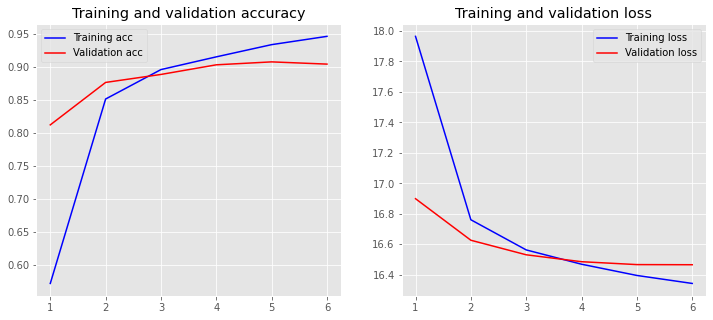

In [ ]:
# Plot the graph 
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['crf_viterbi_accuracy']
    val_accuracy = history.history['val_crf_viterbi_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history2)

In [ ]:
#Evaluating the model
from sklearn.metrics import classification_report
y_pred = model2.predict(np.array(X_test))  
print(classification_report(np.argmax(y_test, 2).ravel(), 
                            np.argmax(y_pred, axis=2).ravel(),
                            labels=list(idx2tag.keys()), 
                            target_names=list(idx2tag.values())))

              precision    recall  f1-score   support

      GN3-LD       0.80      0.25      0.38        16
      KA-KEP       1.00      1.00      1.00        33
     GDT-KTY       1.00      1.00      1.00       133
        KBIL       1.00      0.95      0.98        65
         KPB       1.00      0.94      0.97        18
         KPN       1.00      0.99      1.00       281
          GT       1.00      1.00      1.00       193
         FOR       0.92      0.91      0.92       656
         KAD       0.96      0.94      0.95       233
         KEP       0.81      0.49      0.61        35
     FOR-NEG       0.00      0.00      0.00         3
      GN2-LD       0.67      0.17      0.27        12
      KN-KEP       1.00      1.00      1.00        14
     KAD-KEP       1.00      1.00      1.00        13
          MW       1.00      0.73      0.84        11
      KH-KEP       1.00      1.00      1.00        56
          BY       0.96      0.80      0.87       128
     FOR-KEP       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow.keras.models import save_model
model2.save("model200521-2.tf")

In [ ]:
import pickle
with open('word_to_index200521-2.pickle', 'wb') as f:
    pickle.dump(word2idx, f)

with open('index_to_tag200521-2.pickle', 'wb') as f:
    pickle.dump(idx2tag, f)

In [ ]:
print(word2idx)

{'masa': 1, 'lebar': 2, 'you': 3, 'sains': 4, 'merch': 5, 'terakhir': 6, 'kelmarin': 7, 'setengah': 8, 'low': 9, 'qodo': 10, 'hai': 11, 'wuhu': 12, 'bangang': 13, 'sentiasa': 14, 'cancelled': 15, 'sport': 16, 'macho': 17, 'kasihan': 18, 'giveaway': 19, 'ewah': 20, 'pingge': 21, 'poem': 22, 'famous': 23, 'lapu': 24, 'kakya': 25, 'sokong': 26, 'joox': 27, 'sound': 28, 'pengesahan': 29, 'kompromi': 30, 'racism': 31, 'kejadian': 32, 'pernafasan': 33, 'establish': 34, 'sedak': 35, 'berebut': 36, 'treatment': 37, 'campur': 38, 'fana': 39, 'jalah': 40, 'gaakan': 41, 'masang': 42, 'at': 43, 'lu': 44, 'panjangkan': 45, 'luak': 46, 'pusat': 47, 'gelap': 48, 'bulu': 49, 'shue': 50, 'sha': 51, 'kea': 52, 'kemah': 53, 'they': 54, 'bilang': 55, 'dipersalahkan': 56, 'iffah': 57, 'santun': 58, 'kasih': 59, 'jia': 60, 'tupat': 61, 'sistem': 62, 'laci': 63, 'desc': 64, 'ngh': 65, 'angguk': 66, 'smart': 67, 'mula': 68, 'tercabut': 69, 'berinai': 70, 'bika': 71, 'hapened': 72, 'berusaha': 73, 'cintakah': 

In [ ]:
words=list(word2idx.keys())
words=np.array(words)
print(words[0])

masa


In [ ]:
tags=list(tag2idx.keys())
tags=np.array(tags)
print(tags[0])

GN3-LD


In [ ]:
print(tag2idx)

{'GN3-LD': 1, 'KA-KEP': 2, 'GDT-KTY': 3, 'KBIL': 4, 'KPB': 5, 'KPN': 6, 'GT': 7, 'FOR': 8, 'KAD': 9, 'KEP': 10, 'FOR-NEG': 11, 'GN2-LD': 12, 'KN-KEP': 13, 'KAD-KEP': 14, 'MW': 15, 'KH-KEP': 16, 'BY': 17, 'FOR-KEP': 18, 'KK': 19, 'KN': 20, 'KB-KEP': 21, 'KNF': 22, 'KH': 23, 'KB': 24, 'NEG': 25, 'KPM': 26, 'GN3': 27, 'KS': 28, 'SL': 29, 'LD': 30, 'GN2': 31, 'KP': 32, 'AWL': 33, 'GT-KEP': 34, 'KTY': 35, 'KAR': 36, 'GN1-LD': 37, 'KN-LD': 38, 'KSR': 39, 'KPE': 40, 'KPN-KEP': 41, 'GL': 42, 'GN1': 43, 'KNF-KEP': 44, 'KA': 45}
